In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st

In [ ]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('airbnb.csv',encoding='ISO-8859-1') 
data

In [3]:
#Identificar valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             7
neighbourhood_group               21669
neighbourhood                         6
latitude                              4
longitude                             2
room_type                             9
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [4]:
#Rellenar los valores nulos con el objeto "anterior de la columna" de la columna "host_name"
data["host_name"]= data["host_name"].fillna(method="bfill") 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [5]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         6
latitude                              4
longitude                             2
room_type                             9
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [6]:
#Rellenar los valores nulos con el objeto "posterior" de la columna "neighbourhood"
data["neighbourhood"]= data["neighbourhood"].fillna(method="ffill") 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [7]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              4
longitude                             2
room_type                             9
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [8]:
#Rellenar con el valor de media de la columna los valores nulos de la columna "latitude"
data["latitude"]=data["latitude"].fillna(round(data["latitude"].mean(),5))
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [9]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             2
room_type                             9
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [10]:
#Rellenar con el valor de mediana de la columna los valores nulos de la columna "longitude"
data["longitude"]=data["longitude"].fillna(round(data["longitude"].median(),5))
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [11]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             9
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [12]:
#Rellenar valores nulos de la columna "room_type" con string específico de "Private room" 
data["room_type"]= data["room_type"].fillna("Private room") 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [13]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 1
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [14]:
#Rellenar con el valor de media de la columna los valores nulos de la columna "price", utilizando 0 decimales debido a que así son los datos de la columna originalmente. 
data["price"]=data["price"].fillna(round(data["price"].mean(),0))
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [15]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        1
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [16]:
#Rellenar valores nulos de la columna "minimum_nights" por un valor numérico en  concreto 1
data["minimum_nights"]= data["minimum_nights"].fillna(1) 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [17]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     4
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [18]:
#Rellenar valores nulos de la columna "number of reviews" por valor numérico en  concreto 0
data["number_of_reviews"]= data["number_of_reviews"].fillna(0) 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [19]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3990
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [20]:
#Rellenar valores nulos por un objeto en concreto, en este caso es una fecha para la columna last review
data["last_review"]= data["last_review"].fillna("31/12/2022") 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/2022,NaN,1.0,354.0,0.0


In [21]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                  3990
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [22]:
#Rellenar con el valor de media de la columna los valores nulos de la columna "reviews per month". Se utilizan 2 decimales debido a que asi son los valores encontrados en la columna. 
data["reviews_per_month"]=data["reviews_per_month"].fillna(round(data["reviews_per_month"].mean(),2))
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.59,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,1.59,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/2022,1.59,1.0,354.0,0.0


In [23]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        2
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [24]:
#Rellenar valores nulos por un valor numérico en concreto 1 para la columna de calculated host listings count
data["calculated_host_listings_count"]= data["calculated_host_listings_count"].fillna(1) 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.59,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,1.59,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/2022,1.59,1.0,354.0,0.0


In [25]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      4
number_of_reviews_ltm                 4
dtype: int64

In [26]:
#Rellenar los valores nulos con el objeto "anterior de la columna" en la columna "availability 365"
data["availability_365"]= data["availability_365"].fillna(method="bfill") 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.59,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,1.59,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,314.0,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/2022,1.59,1.0,354.0,0.0


In [27]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 4
dtype: int64

In [28]:
#Rellenar los valores nulos con el objeto "anterior de la columna" en la columna "number of reviews ltm"
data["number_of_reviews_ltm"]= data["number_of_reviews_ltm"].fillna(method="bfill") 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.59,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,1.59,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,314.0,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/2022,1.59,1.0,354.0,0.0


In [29]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  3
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [30]:
#Rellenar valores nulos de la columna name por un string en concreto "Desconocido"
data["name"]= data["name"].fillna("Desconocido") 
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,31/12/2022,1.59,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,31/12/2022,1.59,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,314.0,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,31/12/2022,1.59,1.0,354.0,0.0


In [31]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               21669
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [32]:
#Debido a que en la columna "neighbourhood_group" no hay ninguna entrada, se eliminará
#Eliminamos columnas con nulos
data=data.dropna(1)

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_39456/1520301344.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data=data.dropna(1)


In [33]:
#Comprobar corrección de valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [34]:
#Asegurar que ya no hay datos nulos en toda la base de datos
cuenta_nulos= data.isnull().sum().sum()
cuenta_nulos

0

In [35]:
#Al tener una base de datos sin datos nulos se exploró la cantidad de datos atípicos a través de los métodos de Rango Interquartil y de Desviación Estándar. Se pudo observar que ambos métodos arrojan diferentes cantidades de datos atípicos debido a que los rangos calculados  son menos permisivos a través del método de IQR que del de desviación estándar. Es importante mencionar que lo dicho anteriormente no es regla, sin embargo, debido a que trabajamos con un límite de 3 desviaciones estándar y uno de 1.5 rangos intercuartiles, se pudo observar ese efecto. 
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable latitude
y1=data["latitude"]
limite_superior1= y1.mean() + 3*y1.std()
limite_inferior1= y1.mean() - 3*y1.std()
print("Limite superior permitido", limite_superior1)
print("Limite inferior permitido", limite_inferior1)

Limite superior permitido 22.0250106625759
Limite inferior permitido 16.795013605226025


In [36]:
#Identificar los outliers
outliers1= data[(y1>limite_superior1)|(y1<limite_inferior1)]
outliers1
len(outliers1)

2

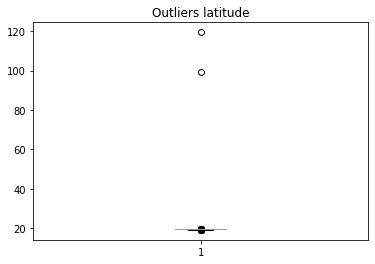

In [37]:
#Realizar diagrama de caja
fig1 = plt.figure(figsize =(6, 4))
plt.boxplot(data["latitude"]) 
plt.title("Outliers latitude")
plt.show() 

In [38]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de longitude
y2=data["longitude"]
limite_superior2= y2.mean() + 3*y2.std()
limite_inferior2= y2.mean() - 3*y2.std()
print("Limite superior permitido", limite_superior2)
print("Limite inferior permitido", limite_inferior2)

Limite superior permitido -89.00097105092638
Limite inferior permitido -109.3286521073947


In [39]:
#Encontramos outliers
outliers2= data[(y2>limite_superior2)|(y2<limite_inferior2)]
outliers2
len(outliers2)

2

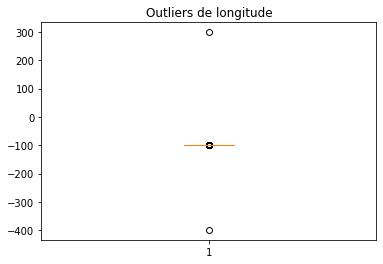

In [40]:
#Realizamos diagrama de caja o bigote
fig2 = plt.figure(figsize =(6, 4))
plt.boxplot(data["longitude"]) 
plt.title("Outliers de longitude")
plt.show() 

In [41]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de price
y3=data["price"]
limite_superior3= y3.mean() + 3*y3.std()
limite_inferior3= y3.mean() - 3*y3.std()
print("Limite superior permitido", limite_superior3)
print("Limite inferior permitido", limite_inferior3)

Limite superior permitido 25905.958087105482
Limite inferior permitido -23004.99200652954


In [42]:
#Encontramos outliers
outliers3= data[(y3>limite_superior3)|(y3<limite_inferior3)]
outliers3
len(outliers3)

46

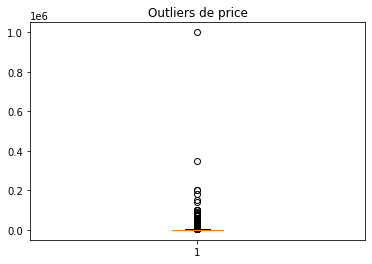

In [43]:
#Realizamos diagrama de caja o bigote
fig3 = plt.figure(figsize =(6, 4))
plt.boxplot(data["price"]) 
plt.title("Outliers de price")
plt.show() 

In [44]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de minimum nights
y4=data["minimum_nights"]
limite_superior4= y4.mean() + 3*y4.std()
limite_inferior4= y4.mean() - 3*y4.std()
print("Limite superior permitido", limite_superior4)
print("Limite inferior permitido", limite_inferior4)

Limite superior permitido 85.28175780845893
Limite inferior permitido -75.59916977947745


In [45]:
#Encontramos outliers
outliers4= data[(y4>limite_superior4)|(y4<limite_inferior4)]
outliers4
len(outliers4)

176

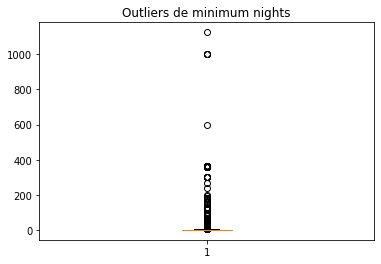

In [46]:
#Realizamos diagrama de caja o bigote
fig4 = plt.figure(figsize =(6, 4))
plt.boxplot(data["minimum_nights"]) 
plt.title("Outliers de minimum nights")
plt.show() 

In [47]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de number of reviews
y5=data["number_of_reviews"]
limite_superior5= y5.mean() + 3*y5.std()
limite_inferior5= y5.mean() - 3*y5.std()
print("Limite superior permitido", limite_superior5)
print("Limite inferior permitido", limite_inferior5)

Limite superior permitido 200.14693399059885
Limite inferior permitido -136.9106978929478


In [48]:
#Encontramos outliers
outliers5= data[(y5>limite_superior5)|(y5<limite_inferior5)]
outliers5
len(outliers5)

532

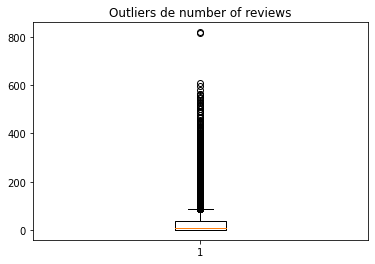

In [49]:
#Realizamos diagrama de caja o bigote
fig5 = plt.figure(figsize =(6, 4))
plt.boxplot(data["number_of_reviews"]) 
plt.title("Outliers de number of reviews")
plt.show() 

In [50]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de reviews per month
y6=data["reviews_per_month"]
limite_superior6= y6.mean() + 3*y6.std()
limite_inferior6= y6.mean() - 3*y6.std()
print("Limite superior permitido", limite_superior6)
print("Limite inferior permitido", limite_inferior6)

Limite superior permitido 7.046654399359017
Limite inferior permitido -3.873128163722854


In [51]:
#Encontramos outliers
outliers6= data[(y6>limite_superior6)|(y6<limite_inferior6)]
outliers6
len(outliers6)

225

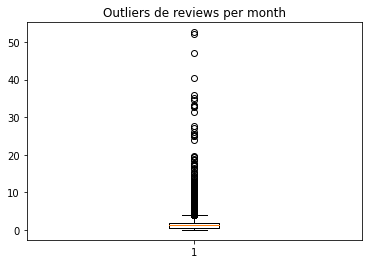

In [52]:
#Realizamos diagrama de caja o bigote
fig6 = plt.figure(figsize =(6, 4))
plt.boxplot(data["reviews_per_month"]) 
plt.title("Outliers de reviews per month")
plt.show() 

In [53]:
#Aplicación de método de distribución normal para identificar outliers, límites de 3 desviaciones estándar para variable de availability_365
y7=data["availability_365"]
limite_superior7= y7.mean() + 3*y7.std()
limite_inferior7= y7.mean() - 3*y7.std()
print("Limite superior permitido", limite_superior7)
print("Limite inferior permitido", limite_inferior7)

Limite superior permitido 612.4014586334399
Limite inferior permitido -125.45042259116755


In [54]:
#Encontramos outliers
outliers7= data[(y7>limite_superior7)|(y7<limite_inferior7)]
outliers7
len(outliers7)

1

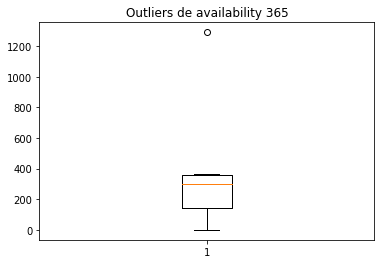

In [55]:
#Realizamos diagrama de caja o bigote
fig7 = plt.figure(figsize =(6, 4))
plt.boxplot(data["availability_365"]) 
plt.title("Outliers de availability 365")
plt.show() 

In [56]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna latitude
y8=data["latitude"]

percentile258=y8.quantile(0.25) #Q1
percentile758=y8.quantile(0.75) #Q3
iqr8= percentile758 - percentile258

limite_superior_iqr8= percentile758 + 1.5*iqr8
limite_inferior_iqr8= percentile258 - 1.5*iqr8
print("Limite superior permitido", limite_superior_iqr8)
print("Limite inferior permitido", limite_inferior_iqr8)

Limite superior permitido 19.507845000000003
Limite inferior permitido 19.303884999999994


In [57]:
#Identificar outliers
outliers_iqr8= data[(y8>limite_superior_iqr8)|(y8<limite_inferior_iqr8)]
outliers_iqr8
len(outliers_iqr8)

1132

In [58]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna longitude
y9=data["longitude"]

percentile259=y9.quantile(0.25) #Q1
percentile759=y9.quantile(0.75) #Q3
iqr9= percentile759 - percentile259

limite_superior_iqr9= percentile759 + 1.5*iqr9
limite_inferior_iqr9= percentile259 - 1.5*iqr9
print("Limite superior permitido", limite_superior_iqr9)
print("Limite inferior permitido", limite_inferior_iqr9)

Limite superior permitido -99.112735
Limite inferior permitido -99.222695


In [59]:
#Identificar outliers
outliers_iqr9= data[(y9>limite_superior_iqr9)|(y9<limite_inferior_iqr9)]
outliers_iqr9
len(outliers_iqr9)

2700

In [60]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna price
y10=data["price"]

percentile2510=y10.quantile(0.25) #Q1
percentile7510=y10.quantile(0.75) #Q3
iqr10= percentile7510 - percentile2510

limite_superior_iqr10= percentile7510 + 1.5*iqr10
limite_inferior_iqr10= percentile2510 - 1.5*iqr10
print("Limite superior permitido", limite_superior_iqr10)
print("Limite inferior permitido", limite_inferior_iqr10)

Limite superior permitido 2960.0
Limite inferior permitido -976.0


In [61]:
#Identificar outliers
outliers_iqr10=data[(y10>limite_superior_iqr10)|(y10<limite_inferior_iqr10)]
outliers_iqr10
len(outliers_iqr10)

1511

In [62]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna minimum nights
y11=data["minimum_nights"]

percentile2511=y11.quantile(0.25) #Q1
percentile7511=y11.quantile(0.75) #Q3
iqr11= percentile7511 - percentile2511

limite_superior_iqr11= percentile7511 + 1.5*iqr11
limite_inferior_iqr11= percentile2511 - 1.5*iqr11
print("Limite superior permitido", limite_superior_iqr11)
print("Limite inferior permitido", limite_inferior_iqr11)

Limite superior permitido 6.0
Limite inferior permitido -2.0


In [63]:
#Identificar outliers
outliers_iqr11=data[(y11>limite_superior_iqr11)|(y11<limite_inferior_iqr11)]
outliers_iqr11
len(outliers_iqr11)

1679

In [64]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna number of reviews
y12=data["number_of_reviews"]

percentile2512=y12.quantile(0.25) #Q1
percentile7512=y12.quantile(0.75) #Q3
iqr12= percentile7512 - percentile2512

limite_superior_iqr12= percentile7512 + 1.5*iqr12
limite_inferior_iqr12= percentile2512 - 1.5*iqr12
print("Limite superior permitido", limite_superior_iqr12)
print("Limite inferior permitido", limite_inferior_iqr12)

Limite superior permitido 86.0
Limite inferior permitido -50.0


In [65]:
#Identificar outliers
outliers_iqr12=data[(y12>limite_superior_iqr12)|(y12<limite_inferior_iqr12)]
outliers_iqr12
len(outliers_iqr12)

2281

In [66]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna reviews per month
y13=data["reviews_per_month"]

percentile2513=y13.quantile(0.25) #Q1
percentile7513=y13.quantile(0.75) #Q3
iqr13= percentile7513 - percentile2513

limite_superior_iqr13= percentile7513 + 1.5*iqr13
limite_inferior_iqr13= percentile2513 - 1.5*iqr13
print("Limite superior permitido", limite_superior_iqr13)
print("Limite inferior permitido", limite_inferior_iqr13)

Limite superior permitido 4.005
Limite inferior permitido -1.6349999999999998


In [67]:
#Identificar outliers
outliers_iqr13=data[(y13>limite_superior_iqr13)|(y13<limite_inferior_iqr13)]
outliers_iqr13
len(outliers_iqr13)

1395

In [68]:
#Aplicar método de rango intercuartílico para identificar outliers, tomando como límites 1.5 IQR para columna availability 365
y14=data["availability_365"]

percentile2514=y14.quantile(0.25) #Q1
percentile7514=y14.quantile(0.75) #Q3
iqr14= percentile7514 - percentile2514

limite_superior_iqr14= percentile7514 + 1.5*iqr14
limite_inferior_iqr14= percentile2514 - 1.5*iqr14
print("Limite superior permitido", limite_superior_iqr14)
print("Limite inferior permitido", limite_inferior_iqr14)

Limite superior permitido 672.5
Limite inferior permitido -171.5


In [69]:
#Identificar outliers
outliers_iqr14=data[(y14>limite_superior_iqr14)|(y14<limite_inferior_iqr14)]
outliers_iqr14
len(outliers_iqr14)

1

In [70]:
#Para tomar la decisión de a través de qué método reemplazarlos, se utilizaron los diagramas de caja para observar qué método era más atinado a los diagramas. Cabe recalcar que a pesar de haber obtenido valores atípicos para longitud y latitud, estos no fueron reemplazados ya que serían utilizados para crear un mapa en la siguiente etapa. 
#Encontrar valores con los que se quieren sustituir los outliers
oprice=st.mean(data.price)
oprice

1450.483040287969

In [71]:
#Sustituir valores nulos con el promedio de la columna, se toma como entero porque todos los valores de esa columna son enteros
#A través del diagrama de caja de precio fue posible observar que los valores atípicos encontrados a través del método de desviación estándar fueron más adecuados que los encontrados con el IQR. Como se puede observar hay una serie de valores atípicos demasiado alejados de los otros valores. Debido a que tampoco se busca hacer demasiados cambios a la base de datos consideramos que fue mejor solamente reemplazar los que se ven sumamente alejados del rango de datos dentro de los límites.  Por ende, se sustituyeron tomando en cuenta el resultado de desviación estándar. Los valores atípicos se sustituyeron por el promedio de la misma variable ya que es una medida que no afecta el mínimo o máximo de la variable.
data["price"] = np.where(((data["price"]>limite_superior3)|(data["price"]<limite_inferior3)),1450,data['price'])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_39456/132164818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["price"] = np.where(((data["price"]>limite_superior3)|(data["price"]<limite_inferior3)),1450,data['price'])


In [72]:
#Encontrar valores con los que se quieren sustituir los outliers
ominimum_nights=st.mode(data.minimum_nights)
ominimum_nights

1.0

In [73]:
#Sustituir valores nulos con el promedio de la columna, se toma como entero porque todos los valores de esa columna son enteros
#Por otra parte, se encontraron diagramas como el de minimum nights. En este caso decidimos utilizar los límites arrojados por el método IQR, lo cual implica que fue una mayor cantidad de atípicos encontrados. Esto se debe a la distribución de datos que podemos observar en el diagrama de caja. Los atípicos encontrados fueron reemplazados por la moda ya que esta toma en cuenta la cantidad mínima de noches que más se repite. 
data["minimum_nights"] = np.where(((data["minimum_nights"]>limite_superior_iqr11)|(data["minimum_nights"]<limite_inferior_iqr11)),1,data['minimum_nights'])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_39456/4184272432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["minimum_nights"] = np.where(((data["minimum_nights"]>limite_superior_iqr11)|(data["minimum_nights"]<limite_inferior_iqr11)),1,data['minimum_nights'])


In [74]:
#Encontrar valores con los que se quieren sustituir los outliers
onumber_of_reviews=st.median(data.number_of_reviews)
onumber_of_reviews

10.0

In [75]:
#Sustituir valores nulos con el promedio de la columna, se toma como entero porque todos los valores de esa columna son enteros
#Dentro de la variable number of reviews decidimos reemplazar los valores atípicos que se encontraron dentro del rango de desviaciones estándar ya que a pesar de encontrar una gran cantidad de valores atípicos, se puede observar en el diagrama que hay una serie de datos mucho más alejada de los demás. Estos fueron reemplazados por la mediana de los datos para que los nuevos valores no se vieran afectados por valores extremos, como sucede en el promedio.
data["number_of_reviews"] = np.where(((data["number_of_reviews"]>limite_superior5)|(data["number_of_reviews"]<limite_inferior5)),10,data['number_of_reviews'])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_39456/1308239754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["number_of_reviews"] = np.where(((data["number_of_reviews"]>limite_superior5)|(data["number_of_reviews"]<limite_inferior5)),10,data['number_of_reviews'])


In [76]:
#Encontrar valores con los que se quieren sustituir los outliers
oreviews_per_month=st.median(data.reviews_per_month)
oreviews_per_month

1.45

In [77]:
#Sustituir valores nulos con el promedio de la columna, se toma como decimal porque todos los valores de esa columna son decimales
#Por otra parte, en la variable de reviews per month sí se utilizaron los límites encontrados con el método IQR ya que podemos observar que hay muchos atípicos. Estos fueron reemplazados por la mediana por la misma razón mencionada anteriormente. 
data["reviews_per_month"] = np.where(((data["reviews_per_month"]>limite_superior_iqr13)|(data["reviews_per_month"]<limite_inferior_iqr13)),1.45,data['reviews_per_month'])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_39456/2539088460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["reviews_per_month"] = np.where(((data["reviews_per_month"]>limite_superior_iqr13)|(data["reviews_per_month"]<limite_inferior_iqr13)),1.45,data['reviews_per_month'])


In [78]:
#Encontrar valores con los que se quieren sustituir los outliers
oavailability_365=st.mean(data.availability_365)
oavailability_365

243.4755180211362

In [79]:
#Sustituir valores nulos con el promedio de la columna, se toma como entero porque todos los valores de esa columna son enteros
#Finalmente, se encontró un valor atípico para la variable de availability 365. Ambos límites resultaron en un valor atípico pero decidimos utilizar los límites dados por el método IQR, esta variable fue reemplazada por el promedio.
data["availability_365"] = np.where(((data["availability_365"]>limite_superior_iqr14)|(data["availability_365"]<limite_inferior_iqr14)),243,data['availability_365'])

/var/folders/h7/3hswkg9n4t7_f3vwwzsc1gv40000gn/T/ipykernel_39456/2144467067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["availability_365"] = np.where(((data["availability_365"]>limite_superior_iqr14)|(data["availability_365"]<limite_inferior_iqr14)),243,data['availability_365'])


In [80]:
#Comprobar que se eliminaron los outliers
outliers15= data[(data["price"]>limite_superior3)|(data["price"]<limite_inferior3)]
outliers15

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [81]:
#Comprobar que se eliminaron los outliers
outliers16= data[(data["minimum_nights"]>limite_superior_iqr11)|(data["minimum_nights"]<limite_inferior_iqr11)]
outliers16

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [82]:
#Comprobar que se eliminaron los outliers
outliers17= data[(data["number_of_reviews"]>limite_superior5)|(data["number_of_reviews"]<limite_inferior5)]
outliers17

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [83]:
#Comprobar que se eliminaron los outliers
outliers18= data[(data["reviews_per_month"]>limite_superior_iqr13)|(data["reviews_per_month"]<limite_inferior_iqr13)]
outliers18

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [84]:
#Comprobar que se eliminaron los outliers
outliers19= data[(data["availability_365"]>limite_superior_iqr14)|(data["availability_365"]<limite_inferior_iqr14)]
outliers19

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [85]:
#Convertir base de datos limpia a csv
data.to_csv("datosfinales.csv")